In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fa(x):
    return 2*x+5
def fb(x):
    return np.cos(np.pi*x)
def fc(x):
    return 5*x**4+3*x**2+6*x+2

def d2fa(x):
    return 0
def d2fb(x):
    return -np.pi**2*np.cos(np.pi*x)
def d2fc(x):
    return 60*x**2+6


In [ ]:
class FiniteDiff:
    def __init__(self, f, d2f, s, e, h=0.1):
        self.f = f  
        self.d2f = d2f
        self.s = s
        self.e = e
        self.h = h
        self.n = int((e - s) / h)
        self.abs_d2f=[]
        self.lerror = []  # Will hold L_infty errors for each scheme
        self.rmserror = []  # Will hold RMSE errors for each scheme
    def abbsolutedif(self):
        for i in range(0, self.n+1):
            x = self.s + i * self.h
            absd2f = self.d2f(x)
            self.abs_d2f.append(absd2f)
    def forward2ndc(self):
        """Second-order forward difference using f(x-h), f(x), f(x+h)"""
        error = []
        # print("forward2ndc====",self.h,self.n)
        # Loop from i=1 to avoid boundary issues (using self.f(self.s + (i-1)*self.h))
        for i in range(1, self.n):
            x = self.s + i * self.h
            approx = (self.f(x + self.h) - 2 * self.f(x) + self.f(x - self.h)) / (self.h ** 2)
            err = approx - self.d2f(x)
            error.append(err)
        # Compute errors
        linf = np.max(np.abs(error))
        rmserr = np.sqrt(np.mean(np.array(error) ** 2))
        self.lerror.append(linf)
        self.rmserror.append(rmserr)
    
    def forward3rdf(self):
        """
        Third-order f orward difference for f''(x) using 5 points:
        f(x), f(x+h), f(x+2h), f(x+3h), f(x+4h)
        
        Standard formula:
          f''(x) ≈ [35 f(x) - 104 f(x+h) + 114 f(x+2h) - 56 f(x+3h) + 11 f(x+4h)]/(12 h^2)
        """
        # print("forward3rdf====",self.h,self.n)
        error = []
        for i in range(0, self.n - 4):
            x = self.s + i * self.h
            approx = (35 * self.f(x) - 104 * self.f(x + self.h) + 114 * self.f(x + 2 * self.h)
                      - 56 * self.f(x + 3 * self.h) + 11 * self.f(x + 4 * self.h)) / (12 * self.h ** 2)
            # print( approx)
            err = approx - self.d2f(x)
            error.append(err)
        linf = np.max(np.abs(error))
        rmserr = np.sqrt(np.mean(np.array(error) ** 2))
        self.lerror.append(linf)
        self.rmserror.append(rmserr)
    
    def forward4ordc(self):
        """
        Fourth-order central difference for f''(x) using 5 points:
        f(x-2h), f(x-h), f(x), f(x+h), f(x+2h)
        
        Standard formula:
          f''(x) ≈ [-f(x+2h) + 16 f(x+h) - 30 f(x) + 16 f(x-h) - f(x-2h)]/(12 h^2)
        """
        error = []
        # print("forward4ordc====",self.h,self.n)
        # Loop from i = 2 to ensure we have values for x-2h and loop until n-1 for x+2h.
        for i in range(2, self.n - 1):
            x = self.s + i * self.h
            approx = (-self.f(x + 2 * self.h) + 16 * self.f(x + self.h) - 30 * self.f(x) +
                      16 * self.f(x - self.h) - self.f(x - 2 * self.h)) / (12 * self.h ** 2)
            err = approx - self.d2f(x)
            error.append(err)
        linf = np.max(np.abs(error))
        rmserr = np.sqrt(np.mean(np.array(error) ** 2))
        self.lerror.append(linf)
        self.rmserror.append(rmserr)
    
    def calculate(self):
        """Run all finite difference schemes and return errors."""
        self.abs_d2f = []
        self.lerror = []
        self.rmserror = []
        self.abbsolutedif()
        self.forward2ndc()
        self.forward3rdf()
        self.forward4ordc()
        return self.abs_d2f,self.lerror, self.rmserror
    def plot(self):
        delxs=[0.1,0.05,0.01,0.001]
        log=np.log(delxs)
        linf_fa=[]
        rms_fa=[]
        abs_d2f=[]
        colors = ['r', 'b', 'g']
        labels = ['2nd Order', '3rd Order', '4th Order']
        titles=['L∞ Error','RMS-error']
        for i in range(len(delxs)):
            self.h=delxs[i]
            self.n=int((self.e - self.s) / self.h)
            absd2f,linf,rms=self.calculate()
            # print(linf,rms)
            linf_fa.append(linf)
            rms_fa.append(rms)
        fig,ax=plt.subplots(figsize=(7,10),nrows=2)
        for j in range(3):
            col_err=[err[j] for err in linf_fa]
            ax[0].plot(np.log10(delxs),np.log10(col_err),color=colors[j],marker='o',linestyle='-',label=labels[j])
        for j in range(3):
            col_err=[err[j] for err in rms_fa]
            ax[1].plot(np.log10(delxs),np.log10(col_err),color=colors[j],marker='o',linestyle='-',label=labels[j])
        for i in range(2):
            ax[i].set_xlabel('log(h)')
            ax[i].set_ylabel(f'log({titles[i]})')
            ax[i].set_title(titles[i])
            ax[i].legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderpad=1, labelspacing=1.2)
        plt.tight_layout()
        plt.show()
            

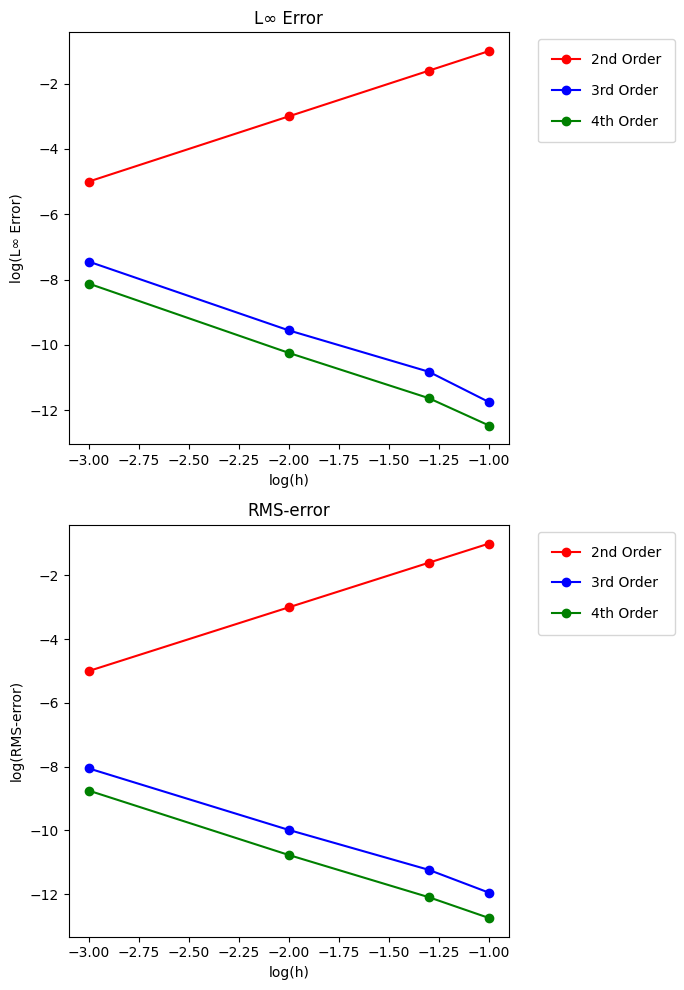

In [15]:
s,e=0,1
obj=FiniteDiff(fc,d2fc,s,e)
obj.plot()

In [41]:
delxs=[0.1,0.05,0.01,0.001]
s,e=0,1
linf_fa=[]
rms_fa=[]
abs_d2f=[]
for i in range(len(delxs)):
    obj=FiniteDiff(fa,d2fa,s,e,delxs[i])
    _,linf,_=obj.calculate()
    linf_fa.append(linf)

In [ ]:
class FiniteDiff2d:
    def __init__(self,L,H,N):
        self.L = L  
        self.H = H
        self.N = N
        self.T_inf=30
        self.h_inf=20
        self.k=30
        self.h = (self.L) / (self.N )
        self.T = np.full((self.N+2, self.N+2),20.0)
        # for i in range(self.N+2):
        #     for j in range(self.N+2):
        #         self.T[i][j] = 20
    ####  left boundary condition dT/dx=0
    def leftboundary(self):
        for j in range(2,self.N+1):
            self.T[1][j]=0
    ### right boundary condition -kdT/dx=h(T-T_inf)
    def rightboundary(self):
        const=2*self.h*self.h_inf/self.k
        # print(const)
        for j in range(2,self.N+1):
            self.T[self.N+1][j]=30
    ### top boundary condition dT/dy=0
    def topboundary(self):
        for i in range(2,self.N+1):
            self.T[i][self.N+1]= 100
    ### bottom boundary condition T=200*x(1-x)
    def bottomboundary(self):
        for i in range(1,self.N+2):
            x=(i-1)*self.L/self.N
            self.T[i][1]=0
    def cornerPoints(self):
        const=2*self.h*self.h_inf/self.k
        self.T[1][self.N+1]= (2*self.T[2][self.N+1]+2*self.T[1][self.N])/4
        self.T[self.N+1][self.N+1]=(1/(4+const))*(const*self.T_inf+
                                    2*(self.T[self.N][self.N+1]+self.T[self.N+1][self.N]))
    def GaussSiedel(self):
        # print(self.h)
        for i in range(2,self.N+1):
            for j in range(2,self.N+1):
                self.T[i][j] = (self.T[i-1][j]+self.T[i][j-1]+self.T[i+1][j]+self.T[i][j+1])/4
    
    def plot(self,N_itr):
        self.bottomboundary()
        self.leftboundary()
        self.rightboundary()
        self.topboundary()
        # self.cornerPoints()
        for i in range(N_itr):
            T_old=np.copy(self.T)
            self.GaussSiedel()
            self.leftboundary()
            self.rightboundary()
            self.topboundary()
            # self.cornerPoints()
            if np.max(np.abs(self.T - T_old)) < 0.00001:
                print(f'Converged in {i} iterations')
                break

        fig,ax=plt.subplots(figsize=(5,5),nrows=1)
        x=np.linspace(0,self.L,self.N+1)
        y=np.linspace(0,self.H,self.N+1)
        X,Y=np.meshgrid(x,y,indexing='ij')
        T=self.T[1:,1:]
        # print(np.rot90(self.T, k=1))
        # print(T)
        contour1= ax.contourf(X,Y,T,cmap='jet')
        fig.colorbar(contour1,ax=ax) 
        plt.show()
obj=FiniteDiff2d(1,1,40)
obj.plot(1000)

array([[10., 10., 10., 10.],
       [10., 10., 10., 10.],
       [10., 10., 10., 10.],
       [10., 10., 10., 10.]])

In [127]:
class FiniteDiffAsgn2:
    def __init__(self,L,H,N):
        self.L = L  
        self.H = H
        self.N = N
        self.T_inf=30
        self.h_inf=20
        self.k=30
        self.h = (self.L) / (self.N )
        self.T = np.full((self.N+2, self.N+2),20.0)
        # for i in range(self.N+2):
        #     for j in range(self.N+2):
        #         self.T[i][j] = 20
    ####  left boundary condition dT/dx=0
    def leftboundary(self):
        for j in range(2,self.N+1):
            self.T[1][j]=(2*self.T[2][j]+self.T[1][j-1]+self.T[1][j+1])/4
    ### right boundary condition -kdT/dx=h(T-T_inf)
    def rightboundary(self):
        const=2*self.h*self.h_inf/self.k
        # print(const)
        for j in range(2,self.N+1):
            self.T[self.N+1][j]=(1/(4+const))*(const*self.T_inf+
                                    2*self.T[self.N][j]+self.T[self.N+1][j-1]+self.T[self.N+1][j+1])
    ### top boundary condition dT/dy=0
    def topboundary(self):
        for i in range(2,self.N+1):
            self.T[i][self.N+1]= (self.T[i+1][self.N+1]+self.T[i-1][self.N+1]+2*self.T[i][self.N])/4
    ### bottom boundary condition T=200*x(1-x)
    def bottomboundary(self):
        for i in range(1,self.N+2):
            x=(i-1)*self.h
            self.T[i][1]=200*x*(1-x)
    def cornerPoints(self):
        const=2*self.h*self.h_inf/self.k
        self.T[1][self.N+1]= (2*self.T[2][self.N+1]+2*self.T[1][self.N])/4
        self.T[self.N+1][self.N+1]=(1/(4+const))*(const*self.T_inf+
                                    2*(self.T[self.N][self.N+1]+self.T[self.N+1][self.N]))
    def GaussSiedel(self,omega):
        # print(self.h)
        for i in range(2,self.N+1):
            for j in range(2,self.N+1):
                self.T[i][j] =(1-omega)*self.T[i][j]+ omega* (self.T[i-1][j]+self.T[i][j-1]+self.T[i+1][j]+self.T[i][j+1])/4
    def diagonal_Temp(self):
        T_diag=[self.T[k][k] for k in range(1,self.N+2)]
        return T_diag
    def plot(self,N_itr,omega):
        self.bottomboundary()
        self.leftboundary()
        self.rightboundary()
        self.topboundary()
        self.cornerPoints()
        for i in range(N_itr):
            T_old=np.copy(self.T)
            self.GaussSiedel(omega)
            self.leftboundary()
            self.rightboundary()
            self.topboundary()
            self.cornerPoints()
            if np.max(np.abs(self.T - T_old)) < 10**-6:
                print(f'Converged in {i} iterations')
                break
                

        fig,ax=plt.subplots(figsize=(6,5),nrows=1)
        x=np.linspace(0,self.L,self.N+1)
        y=np.linspace(0,self.H,self.N+1)
        X,Y=np.meshgrid(x,y,indexing='ij')
        T=self.T[1:,1:]
        # print(np.rot90(self.T, k=1))
        # print(T)
        # contour1= ax.contourf(X,Y,T,levels=20,cmap='jet')
        # fig.colorbar(contour1,ax=ax) 
        # ax.set_title(f'Gauss Siedel for grid size={f"{self.h:.4f}"}, Omega:={omega}')
        # ax.set_xlabel('x(i)')
        # ax.set_ylabel('y(j)')

        # plt.show()
        return min(i,N_itr)

In [ ]:
N=[10,20,35,40]
T_diag = [[] for _ in range(len(N))]
for i in range(len(N)):
    obj=FiniteDiffAsgn2(1,1,N[i])
    N_optim = obj.plot(30000,omega=1)
    T_diag[i]=obj.diagonal_Temp()
    # print(T_diag[i])

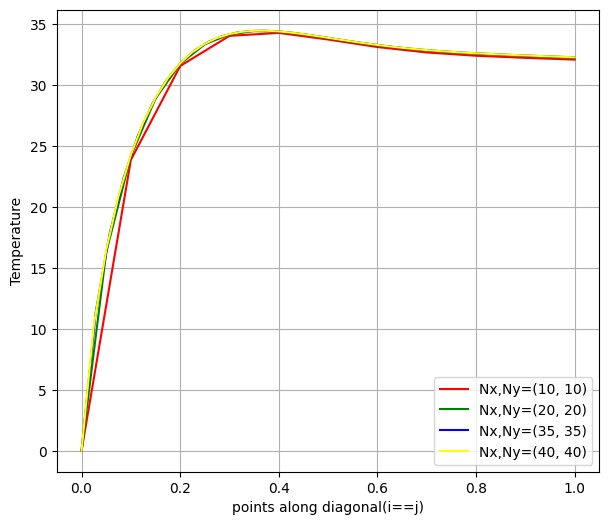

In [122]:
N=[10,20,35,40]
colors =['red','green','blue','yellow','orange']
# points=[k  for k in range(1,N[-1]+2)]
plt.figure(figsize=(7, 6))
for i in range(len(N)):
    points = np.linspace(0, 1, len(T_diag[i]))
    plt.plot(points,T_diag[i],color=colors[i],label=f"Nx,Ny={N[i],N[i]}")
plt.xlabel("points along diagonal(i==j)")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
N_opt = 20
omega_values = np.arange(1.0, 3, 0.05)  # Test different omegas
best_omega = 1.0
min_iterations = float("inf")

for omega in omega_values:
    obj = FiniteDiffAsgn2(L=1, H=1, N=N_opt)
    iterations = obj.plot(N_itr=30000, omega=omega)
    print(f"Omega={omega:.2f}, Iterations={iterations}")

    if iterations < min_iterations:
        min_iterations = iterations
        best_omega = omega

print(f"\nOptimal SOR factor (omega) for N={N_opt}: {best_omega:.2f}, Converged in {min_iterations} iterations")


In [29]:
class FiniteDiffAsgn2_b:
    def __init__(self,L,H,N=20):
        self.L = L  
        self.H = H
        self.N = N
        self.T_inf=30
        self.h_inf=20
        self.k=30
        self.h = (self.L) / (self.N )
        self.T = np.full((self.N+2, self.N+2),30.0)
    def leftboundary(self):
        for j in range(2,self.N+1):
            self.T[1][j]=0.25*(2*self.T[2][j]+self.T[1][j-1]+self.T[1][j+1])
    def rightboundary(self):
        const=2*self.h*self.h_inf/self.k
        n=int(0.5*self.N+1)
        for j in range(2,n):
            self.T[self.N+1][j]=(0.25/(1+0.25*const))*(const*self.T_inf+
                                    2*self.T[self.N][j]+self.T[self.N+1][j-1]+self.T[self.N+1][j+1])
        for j in range(n+1,self.N+1):
            self.T[n][j]=0.25*(2*self.T[n-1][j]+self.T[n][j-1]+self.T[n][j+1])

    def topboundary(self):
        n=int(0.5*self.N+1)
        for i in range(2,n):
            self.T[i][self.N+1]=0.25*(self.T[i+1][self.N+1]+self.T[i-1][self.N+1]+2*self.T[i][self.N])
        for i in range(n+1,self.N+1):
            self.T[i][n]=0.25*(self.T[i+1][n]+self.T[i-1][n]+2*self.T[i][n-1])
    def bottomboundary(self):
        for i in range(1,self.N+2):
            x=(i-1)*self.L/self.N
            self.T[i][1]=200*x*(1-x)
    def cornerPoints(self):
        n=int(0.5*self.N+1)
        self.T[n][n]=0.5*(self.T[n+1][n]+self.T[n][n+1])
        self.T[n][self.N+1]=0.5*(self.T[n-1][self.N+1]+self.T[n][self.N])
        const=2*self.h*self.h_inf/self.k
        self.T[1][self.N+1]=0.25*(2*self.T[2][self.N+1]+2*self.T[1][self.N])
        self.T[self.N+1][n]=(0.25/(1+0.25*const))*(const*self.T_inf+
                                    2*(self.T[self.N][n]+self.T[self.N+1][n-1]))
    def GaussSiedel(self,omega):
        n=int(0.5*self.N+1)
        for i in range(2,self.N+1):
            for j in range(2,self.N+1):
                if i<n or j<n:
                    self.T[i][j] =(1-omega)*self.T[i][j]+ omega* (self.T[i-1][j]+self.T[i][j-1]+self.T[i+1][j]+self.T[i][j+1])/4

    
    def plot(self,N_itr,omega):
        self.bottomboundary()
        self.leftboundary()
        self.rightboundary()
        self.topboundary()
        self.cornerPoints()
        n=int(0.5*self.N+1)
        for i in range(N_itr):
            T_old=np.copy(self.T)
            self.GaussSiedel(omega)
            self.leftboundary()
            self.rightboundary()
            self.topboundary()
            self.cornerPoints()
            # print(np.max(np.abs(self.T - T_old)))
            # for i in range(2,self.N+1):
            #     for j in range(2,self.N+1):
            #         if i<n or j<n:
            #             max_diff = np.max(np.abs(self.T[i][j] - T_old[i][j]))
            # print(max_diff)
            if np.max(np.abs(self.T - T_old)) < 10**-6:
                print(f'Converged in {i} iterations')
                break
        for i in range(n+1,self.N+2):
            for j in range(n+1,self.N+2):
                self.T[i][j]=0
        fig,ax=plt.subplots(figsize=(7,5),nrows=1)
        x=np.linspace(0,self.L,self.N+1)
        y=np.linspace(0,self.H,self.N+1)

        X,Y=np.meshgrid(x,y,indexing='ij')
        T=self.T[1:,1:]
        # print(np.rot90(self.T, k=1))
        # print(T)
        contour1= ax.contourf(X,Y,T,levels=20,cmap='jet')
        fig.colorbar(contour1,ax=ax) 
        ax.scatter(0.5, 0.5, color='red', marker='o', s=50, label='Point (0.5, 0.5)')
        ax.set_title(f'Gauss Siedel for grid size={f"{self.h:.4f}"}, Omega:={omega}')
        ax.set_xlabel('x(i)')
        ax.set_ylabel('y(j)')
        plt.show()
    def Temp_at_discreate_points(self,x):
        i=int(x*self.N+1)
        print(i)
        return self.T[i][i]

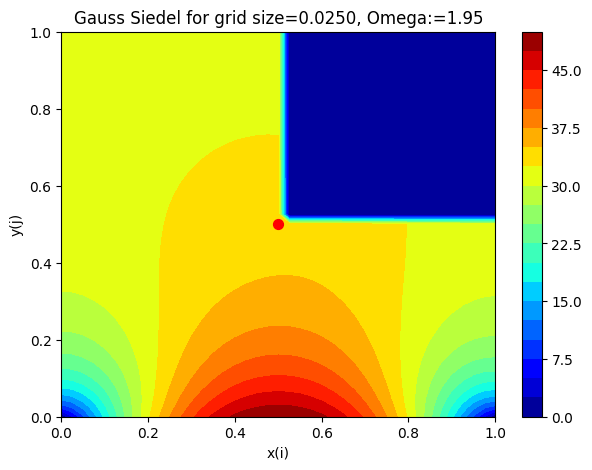

In [30]:
obj=FiniteDiffAsgn2_b(1,1,40)
obj.plot(100,omega=1.95)

In [31]:
obj.Temp_at_discreate_points(0.5),obj.Temp_at_discreate_points(0.25)

21
11


(np.float64(33.731625429510245), np.float64(33.16192813121417))

11


np.float64(29.454605881190215)